Код нашёл в сети. Автор Изабела Бенабей:  
https://github.com/isabellabenabaye/community-project  
  
  Последний блок с построением графика писал уже сам.

## Выкачиваем информацию

In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl

In [2]:
# Мутим
wire_episodes = []

# Значение 6 (5+1) заменить на количество сезонов у сериала
for sn in range(1,6):
    # Запрашиваем содержимое страницы и сохраняем результат в в переменной респонс
    response = get('https://www.imdb.com/title/tt0306414/episodes?season=' + str(sn))

    # Подключаем Супчик
    page_html = BeautifulSoup(response.text, 'html.parser')

    # Продираемся сквозь вёрстку
    episode_containers = page_html.find_all('div', class_ = 'info')

    # Для каждого эпизода в каждом сезоне
    for episodes in episode_containers:
            # Получаем инфу о всех эпизодах
            season = sn
            episode_number = episodes.meta['content']
            title = episodes.a['title']
            airdate = episodes.find('div', class_='airdate').text.strip()
            rating = episodes.find('span', class_='ipl-rating-star__rating').text
            total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
            desc = episodes.find('div', class_='item_description').text.strip()
            # Подбиваю всю полученную инфу
            episode_data = [season, episode_number, title, airdate, rating, total_votes, desc]

            # Добавляю инфу об эпизоде к датасету
            wire_episodes.append(episode_data)

In [3]:
wire_episodes = pd.DataFrame(wire_episodes, columns = ['season', 'episode_number', 
                                                       'title', 'airdate', 'rating', 
                                                       'total_votes', 'desc'])

## Смотрим листинг по сериалу (грязный)

In [4]:
wire_episodes
# wire_episodes.head(5)

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,The Target,2 Jun. 2002,8.0,"(5,622)",Baltimore Det. Jimmy McNulty finds himself in ...
1,1,2,The Detail,9 Jun. 2002,8.3,"(4,587)",Lt. Daniels puts his team together but the ext...
2,1,3,The Buys,16 Jun. 2002,8.3,"(4,300)","After two weeks on the job, the team still doe..."
3,1,4,Old Cases,23 Jun. 2002,8.3,"(4,167)",Bodie walks out of detention pretending to be ...
4,1,5,The Pager,30 Jun. 2002,8.4,"(3,993)",Avon Barksdale is becoming paranoid and thinks...
5,1,6,The Wire,7 Jul. 2002,8.6,"(4,168)",Avon takes care of Omar's man Brandon but Wall...
6,1,7,One Arrest,21 Jul. 2002,8.5,"(3,899)",Burrell reluctantly sides with Daniels in the ...
7,1,8,Lessons,28 Jul. 2002,8.6,"(3,876)",McNulty uses his children to tail Stringer aft...
8,1,9,Game Day,4 Aug. 2002,8.8,"(4,008)","D'Angelo speaks to Wallace, who tells him he w..."
9,1,10,The Cost,11 Aug. 2002,9.2,"(4,586)","Avon, Stringer and Wee-Bey discuss how best to..."


## Очистка данных

Тут всякие скобочки и прочий мусор убираются.  
И количество проголосовавших преобразуется в числовые значения, а то оно там с запятой какой-то.

In [5]:
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
        
    return votes

In [6]:
wire_episodes['total_votes'] = wire_episodes.total_votes.apply(remove_str).astype(int)

wire_episodes.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,The Target,2 Jun. 2002,8.0,5622,Baltimore Det. Jimmy McNulty finds himself in ...
1,1,2,The Detail,9 Jun. 2002,8.3,4587,Lt. Daniels puts his team together but the ext...
2,1,3,The Buys,16 Jun. 2002,8.3,4300,"After two weeks on the job, the team still doe..."
3,1,4,Old Cases,23 Jun. 2002,8.3,4167,Bodie walks out of detention pretending to be ...
4,1,5,The Pager,30 Jun. 2002,8.4,3993,Avon Barksdale is becoming paranoid and thinks...


Делаю рейтинг серий числовым, флоат.  
Ну и с датой выхода эпизода тоже

In [7]:
wire_episodes['rating'] = wire_episodes.rating.astype(float)

In [8]:
wire_episodes['airdate'] = pd.to_datetime(wire_episodes.airdate)
wire_episodes['episode_number'] = wire_episodes['episode_number'].astype('int64')

wire_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          60 non-null     int64         
 1   episode_number  60 non-null     int64         
 2   title           60 non-null     object        
 3   airdate         60 non-null     datetime64[ns]
 4   rating          60 non-null     float64       
 5   total_votes     60 non-null     int32         
 6   desc            60 non-null     object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(2)
memory usage: 3.2+ KB


## Выгрузка

Ну и апофеоз действа — скачиваю это всё в цсв.

In [9]:
wire_episodes.to_csv('Wire_IMDb_Ratings.csv',index=False)

## Строим график

Здесь немного разворачивается (транспонируется) таблица.  
Затем строится тепловая карта.

In [ ]:
wire_episodes.head(5)

In [9]:
# Разворачиваю таблицу, часть данных при этом перестаёт отображатся
we = pd.pivot_table(wire_episodes, index=['season'], columns=['episode_number'], values=['rating'])
we.columns = we.columns.droplevel(0)

In [10]:
we.head()

episode_number,1,2,3,4,5,6,7,8,9,10,11,12,13
season,,,,,,,,,,,,,
1,8.0,8.3,8.3,8.3,8.4,8.6,8.5,8.6,8.8,9.2,8.9,9.1,9.0
2,7.9,8.2,8.2,8.1,8.2,8.8,8.4,8.5,8.6,9.0,9.2,9.0,NaN
3,8.2,8.5,8.5,8.5,8.6,8.7,8.6,8.9,8.8,8.8,9.6,9.3,NaN
4,8.4,8.6,8.7,8.4,8.6,8.8,8.6,8.6,8.6,8.8,9.0,9.3,9.5
5,8.2,8.3,8.6,8.9,8.7,8.5,8.6,8.9,9.3,9.6,NaN,NaN,NaN


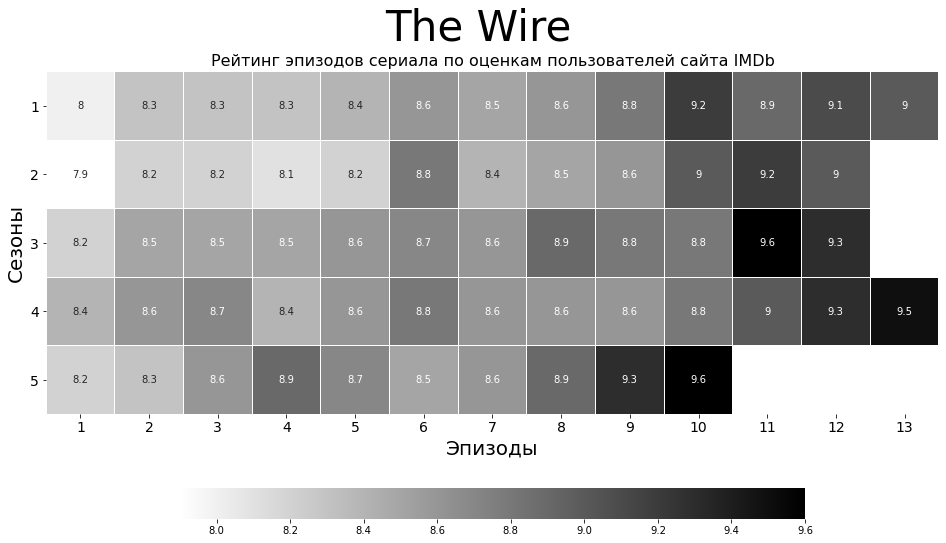

In [11]:
# Построение графика
fig, ax = plt.subplots(figsize=(16, 9))
ax = sns.heatmap(data=we, annot = True,
                 cmap = 'gist_yarg',
                 cbar_kws={"orientation": "horizontal", "shrink": .70},
                 linewidths=.1
                )

plt.yticks(rotation=0, fontsize = 14)
plt.xticks(rotation=0, fontsize = 14)
plt.suptitle('The Wire', fontsize = 42)
plt.title('Рейтинг эпизодов сериала по оценкам пользователей сайта IMDb', fontsize=16)
plt.xlabel('Эпизоды', fontsize = 20)
plt.ylabel('Сезоны', fontsize = 20)
plt.show()